In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from wordcloud import WordCloud
from datetime import datetime

In [44]:
!gdown https://drive.google.com/uc?id=1x_3IwnZNC3lQg4AVQno0AQLUHm50Sz5R

Downloading...
From: https://drive.google.com/uc?id=1x_3IwnZNC3lQg4AVQno0AQLUHm50Sz5R
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 158MB/s]


In [45]:
data = pd.read_csv('netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


First observations


*   There are null values in Director,Cast,country coloumns
*   Durations coloumn has a mixed values ones with seasons and ones with times
*   There are multiple values in the cast coloumn separated by ","
*   Listed coloumn also had multiple values separated by ","





# **Initial** **Analysis**

Shape of the data

In [46]:
data.shape

(8807, 12)

The data set has currntly 8807 rows and 12 coloumns

Information of the data we have the kind

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Total No of Missing value counts

In [48]:
data.isnull().sum().sum()

4307

Total No of Null values across the entire data set

# **Univariate Analysis**

Analysis performed on coloumn or variables

In [49]:
data['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


We Have two different types of data One is the Movie and other is the TV Show and total we have around 6131 and 2676 no of values

In [50]:
data['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


Above data shows the ratings and the total count of each

In [51]:
data['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


In [52]:
data.groupby('release_year')['release_year'].aggregate('count').sort_values(ascending=False)

,release_year
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1961,1
1947,1


<Axes: >

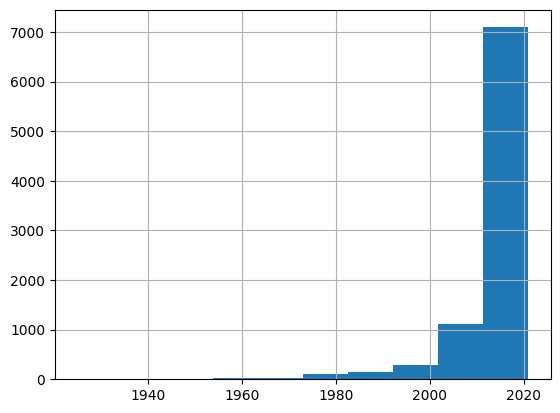

In [53]:
data['release_year'].hist()

Checking for duplicates

In [54]:
data.duplicated().value_counts()

,count
False,8807


This goes to say that there are no repeated entries in the data set

Converting the data added to data time format

In [55]:
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


The format of date and time have been converted to "Y-M-D" format and this we will be able to extract and convert to the format required for the analysis

Extracting month and year

In [56]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0


# **Season conversion**

Now we have seen that there are seasons present for TV shows and we do not know the mins for it so let us consider one season has 30 episodes of each 30 mins which accounts to more of sitcomes these days which is of 900 min

In [57]:
def conversion(row):
    if ("season" in row.lower()):
        num = int(row.split()[0])
        return num * 30 * 30
    else:
        return int(row.split()[0]) if row else 0
data['duration'] = data['duration'].fillna('').astype(str)
data['duration_num'] = data['duration'].apply(conversion)
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,1800
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,900


If seen the duration num is converted to number values in terms of mins

# **Handeling the Missing Values**

*   Fill missing values in 'director' and 'cast' with 'Unknown'
*   Fill missing values in 'country' with 'Unknown'
*   Fill missing values in 'cast' with 'Unknown'
*   Fill missing values in 'date_added' with 'Unknown'
*   Fill missing values in 'rating' with 'Unknown'
*   Fill missing values in 'duration' with 'Unknown'

In [58]:
data['director'] = data['director'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Unknown')
data['duration'] = data['duration'].fillna('Unknown')
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,1800
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,900


All the missing data has been replaced

# **Graphical and Non Graphical Analysis of the data count per category**

**Growth of content over the period**

In [59]:
data['year_added'].value_counts(ascending=False)

,count
year_added,
2019.0,1999
2020.0,1878
2018.0,1625
2021.0,1498
2017.0,1164
2016.0,418
2015.0,73
2014.0,23
2011.0,13


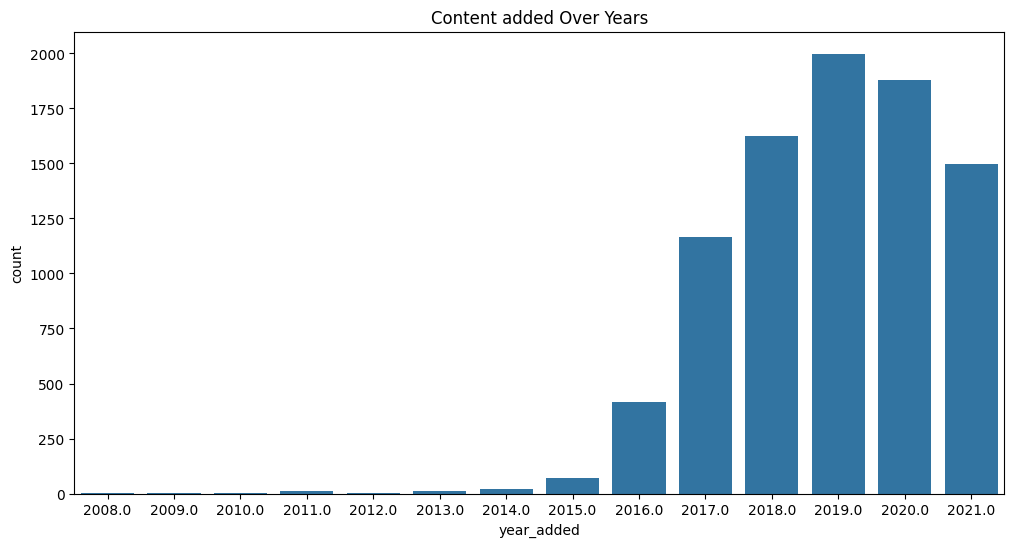

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='year_added')
plt.title('Content added Over Years')
plt.show()

The graphical representation shows that the content was minimum in the year 2008 to 2010 and was highest in the year 2019

**No of releats per year**

In [61]:
data['release_year'].value_counts(ascending=False)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


since the data is huge we will consider only from 2008

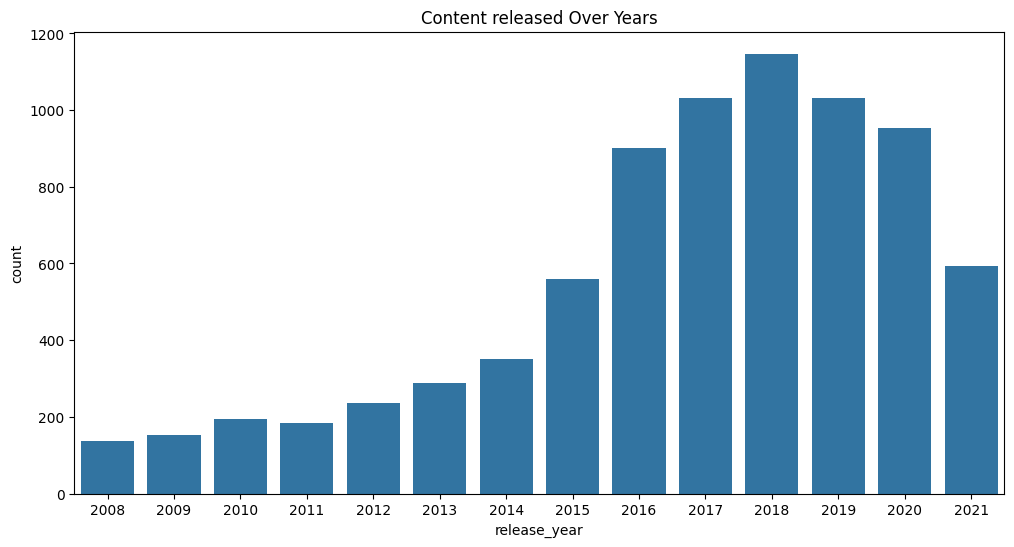

In [62]:
mroy=data[data['release_year']>=2008]
plt.figure(figsize=(12, 6))
sns.countplot(data=mroy, x='release_year')
plt.title('Content released Over Years')
plt.show()

We can see that the content released from 2018 to 2021 with 2018 being the highest

**Rating Patterns**

In [63]:
data['rating'].value_counts(ascending=False)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


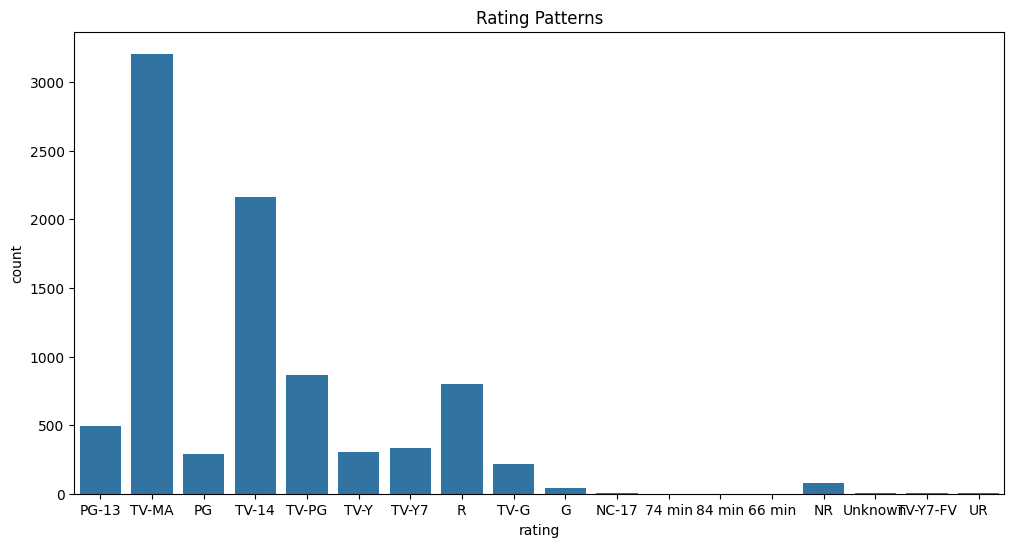

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='rating')
plt.title('Rating Patterns')
plt.show()

We can see that TV-MA has the highest rating

Countries which have more than 100 release of movies or tv shows

In [65]:
country_counts = data.groupby('country')['country'].transform('count')
countries = data[country_counts > 100]
countries.groupby('country')['country'].aggregate('count').sort_values(ascending=False)

,country
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


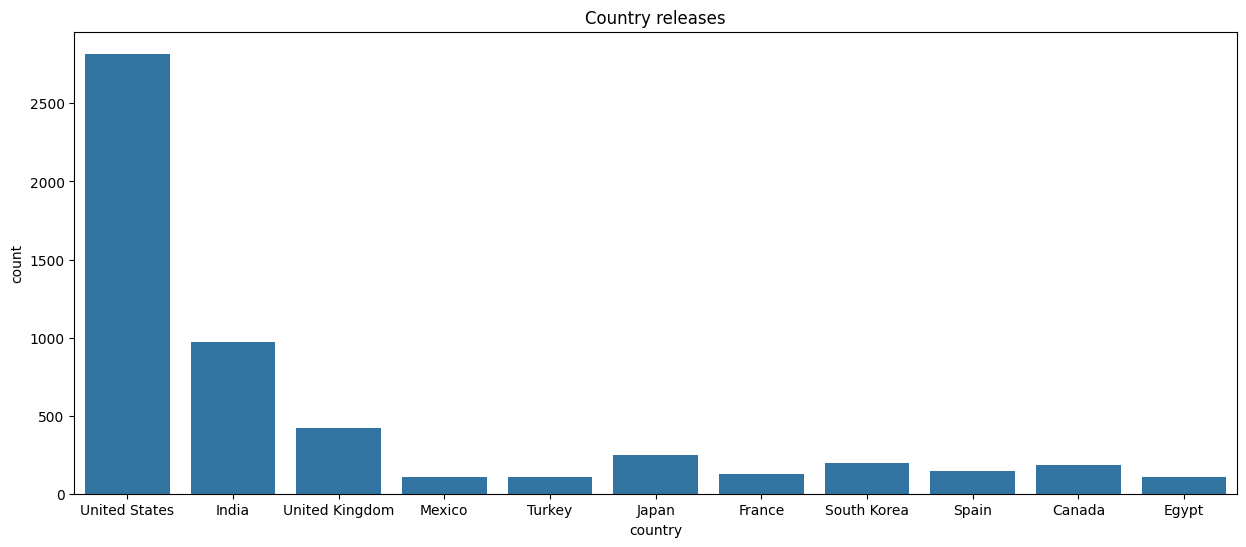

In [66]:
country_counts = data.groupby('country')['country'].transform('count')
countries = data[(country_counts > 100) & (data['country']!="Unknown")]
plt.figure(figsize=(15, 6))
sns.countplot(data=countries, x='country')
plt.title('Country releases')
plt.show()

We can see that United States has highest number of releases next to India

**By Genres**

In [67]:
genre=data['listed_in'].str.split(',').explode().str.strip()
mgenre = genre.value_counts().head(10)
mgenre

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


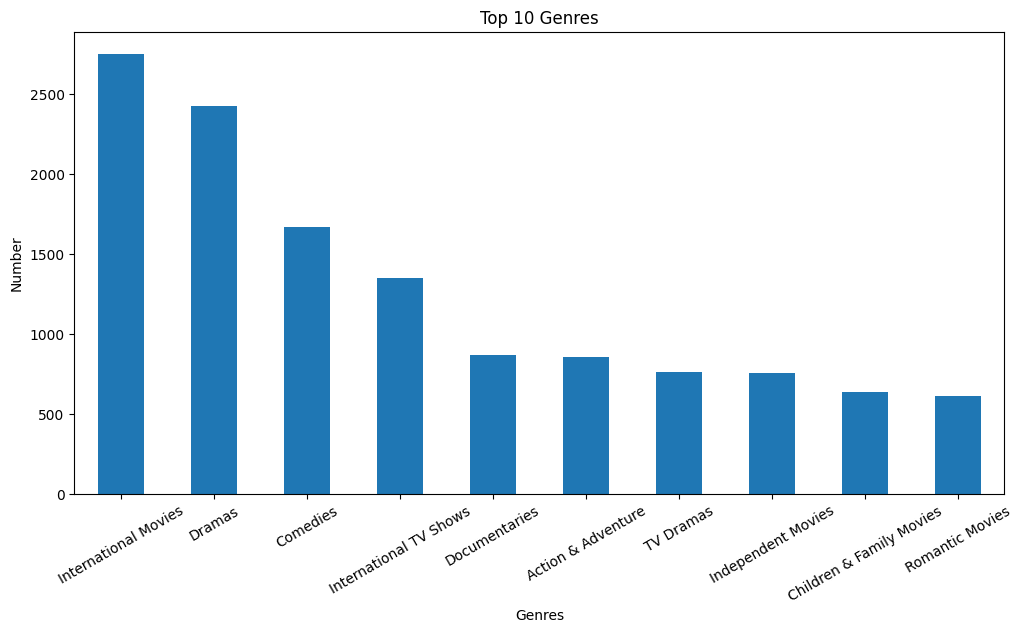

In [68]:
plt.figure(figsize=(12, 6))
mgenre.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Number')
plt.xticks(rotation=30)
plt.show()

We can see that the count of Internation Movies as Genre is the highest

**By Director**

In [69]:
data['director'].value_counts(ascending=False)

,count
director,
Unknown,2634
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


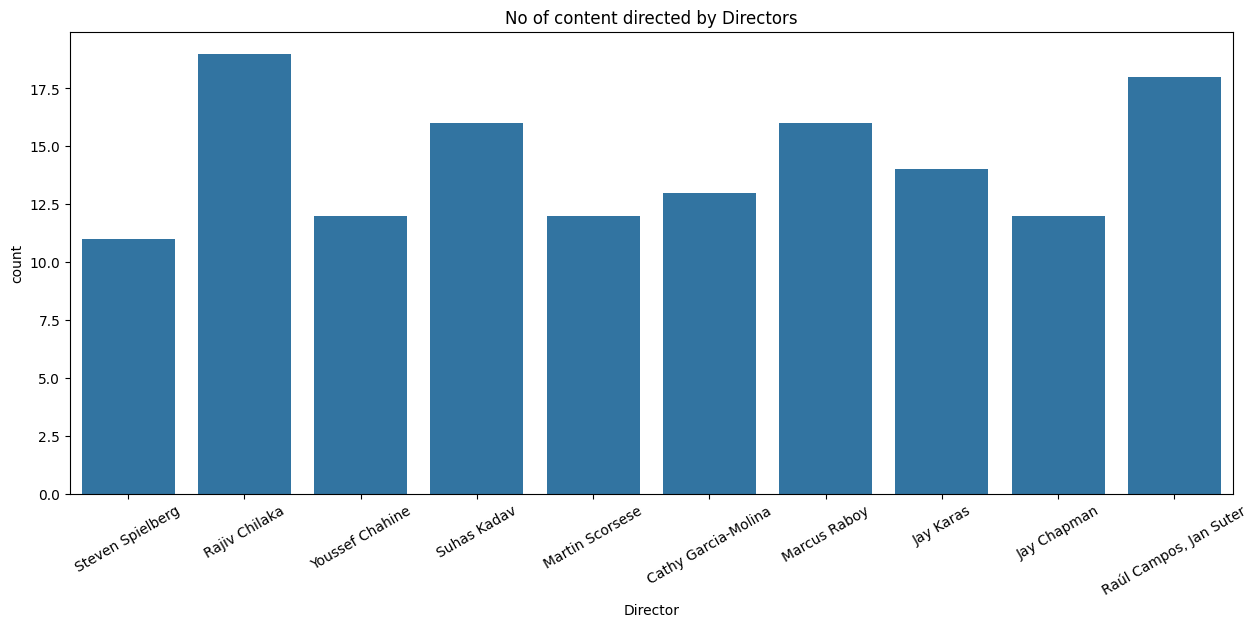

In [70]:
dcount=data.groupby('director')['director'].transform('count')
dcount1 = data[(dcount > 10) & (data['director']!="Unknown")]
plt.figure(figsize=(15, 6))
sns.countplot(data=dcount1, x='director')
plt.title('No of content directed by Directors')
plt.xlabel('Director')
plt.xticks(rotation=30)
plt.show()

We Can See that Rajiv Chilaka has directed the highest no of content

By Cast

In [71]:
cast = data['cast'].str.split(',').explode().str.strip()
cast = cast[cast != "Unknown"]
castc = cast.value_counts().head(10)
castc

,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30
Yuki Kaji,29


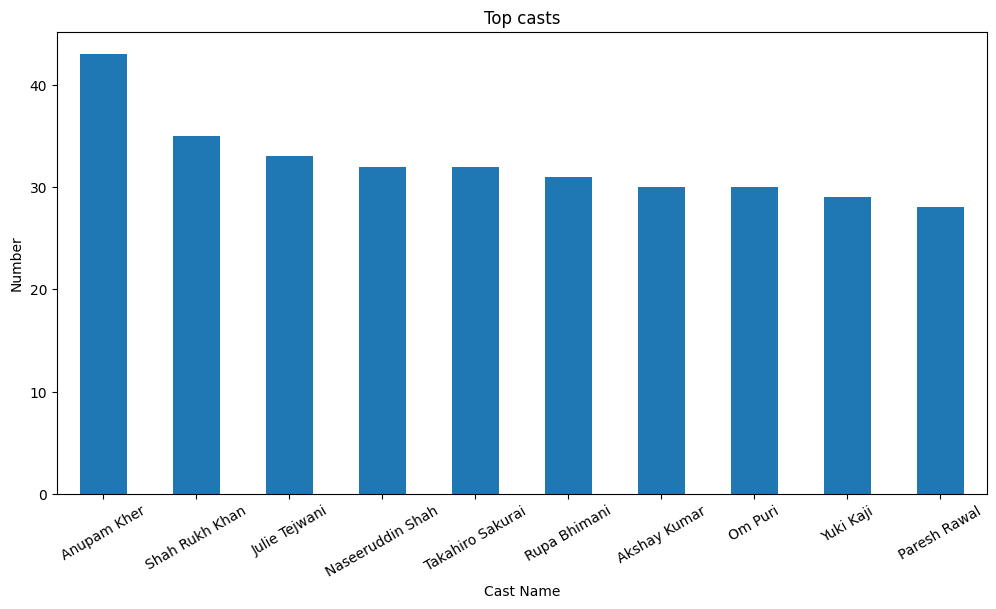

In [72]:
plt.figure(figsize=(12, 6))
castc.plot(kind='bar')
plt.title('Top casts')
plt.xlabel('Cast Name')
plt.ylabel('Number')
plt.xticks(rotation=30)
plt.show()

Anupam Kher has acted the highest in the content present in the netflix and shah rukh khan being next

# **1) How has the number of movies released per year changed over the last 20-30 years?**

In [73]:
newdata=data[(data['type']=="Movie") & (data['release_year'] > 1990)]
newdata['release_year'].value_counts()

,count
release_year,
2017,767
2018,767
2016,658
2019,633
2020,517
2015,398
2021,277
2014,264
2013,225


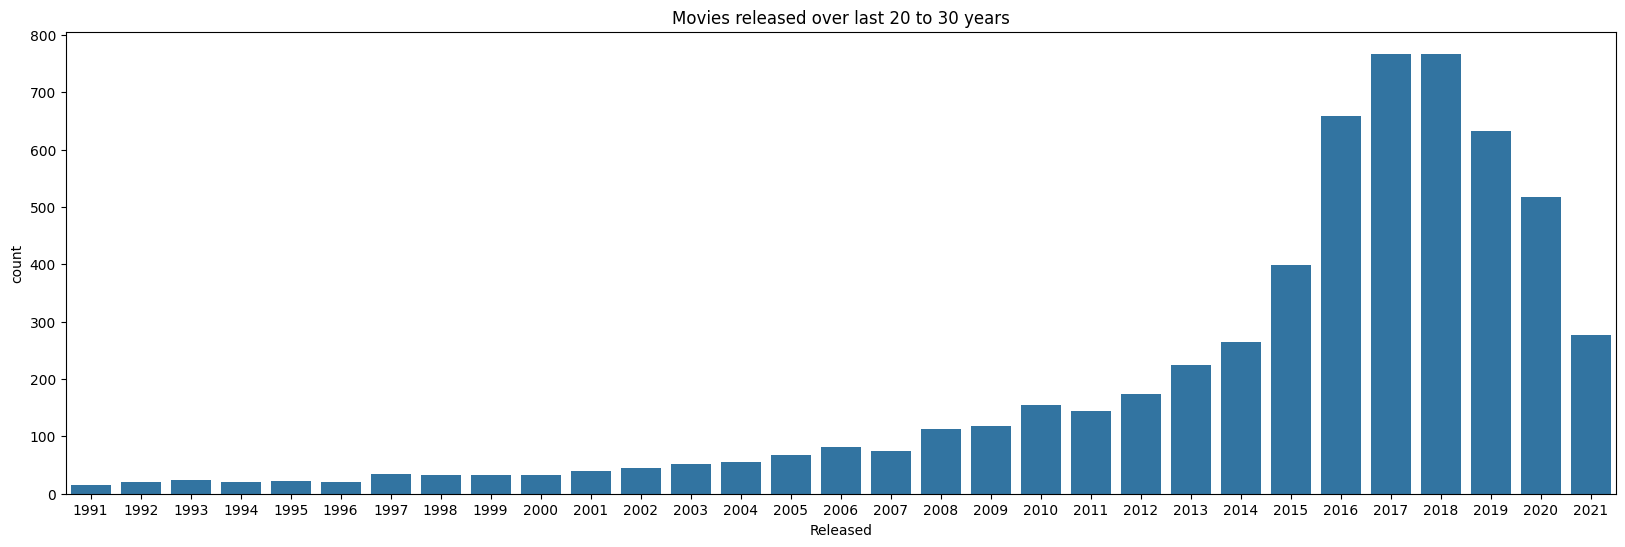

In [74]:
def moviesLast20to30(data):
  newdata=data[(data['type']=="Movie") & (data['release_year'] > 1990)]
  plt.figure(figsize=(20, 6))
  sns.countplot(data=newdata, x='release_year')
  plt.title('Movies released over last 20 to 30 years')
  plt.xlabel('Released')
  plt.show()

moviesLast20to30(data)

The no of movies released in the year 2017 and 2018 is the highest which accounts to of about 767 whiles 1991 being the lowest

# **2) Comparison of tv shows vs. movies**

In [75]:
data['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


Text(0.5, 1.0, 'Movies vs TV Show')

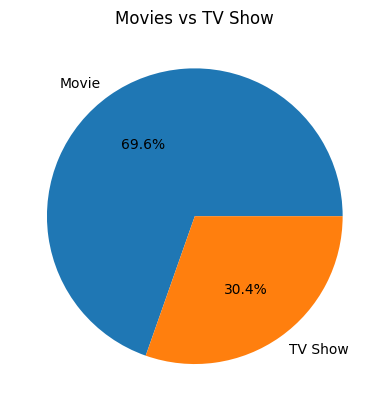

In [76]:
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%1.1f%%')
plt.title("Movies vs TV Show")

When the overall data is seen we can see that the no of movies present over the netflix is more than that of the TV show

Movies produced in each country

In [77]:
ndc=data[(data['type']=="Movie") & (data['country']!="Unknown")]
gdc=ndc['country'].str.split(',').explode().str.strip().value_counts().head(10)
gdc

,count
country,
United States,2752
India,962
United Kingdom,534
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


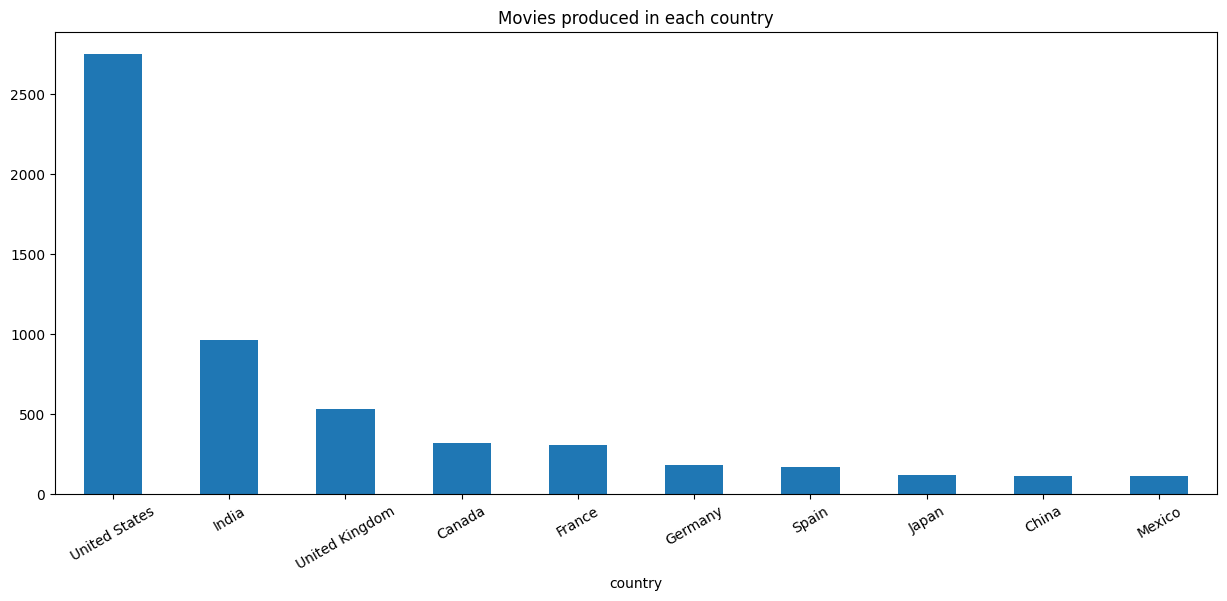

In [78]:
def moviesproducedineachcountry(data):
  newdata=data[(data['type']=="Movie") & (data['country']!="Unknown")]
  gdata=newdata['country'].str.split(',').explode().str.strip()
  gdatac=gdata.value_counts().head(10)
  plt.figure(figsize=(15, 6))
  gdatac.plot(kind='bar')
  plt.title('Movies produced in each country')
  plt.xlabel('country')
  plt.xticks(rotation=30)
  plt.show()



moviesproducedineachcountry(data)

United States has the highest no of movies released that is 2752 marking the highest no of movies and the next is India which is 962

Tv Shows produced in each country

In [79]:
ndtvc=data[(data['type']=="TV Show") & (data['country']!="Unknown")]
gdtvc=ndtvc['country'].str.split(',').explode().str.strip().value_counts().head(10)
gdtvc

,count
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


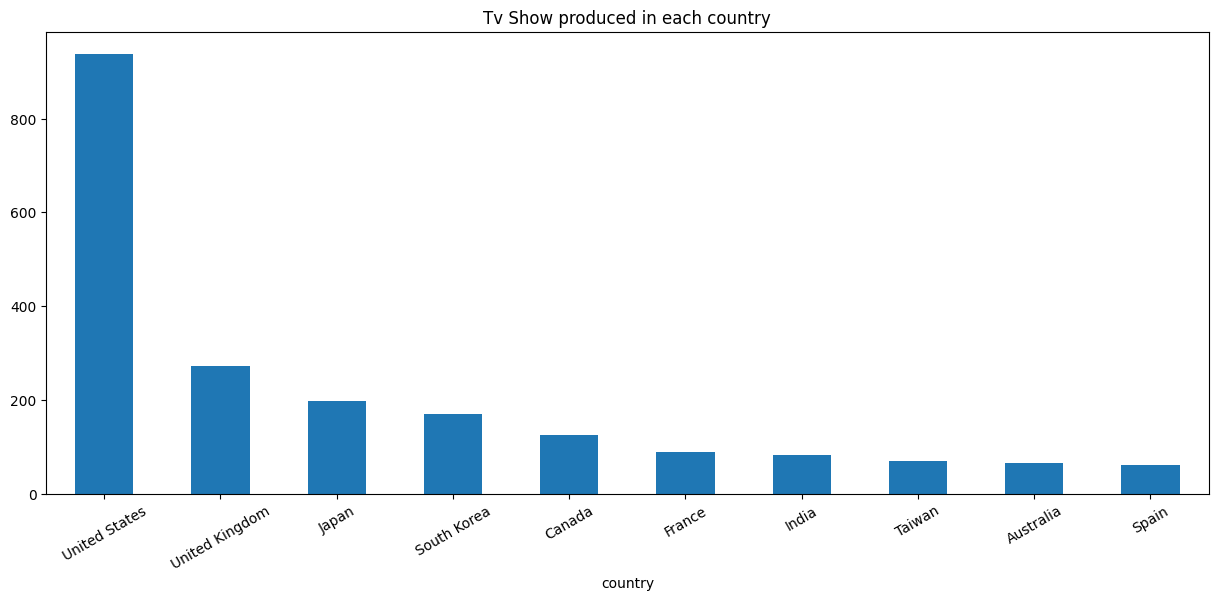

In [80]:
def tvshowproducedineachcountry(data):
  newtvdata=data[(data['type']=="TV Show") & (data['country']!="Unknown")]
  gtvdata=newtvdata['country'].str.split(',').explode().str.strip()
  gtvdatac=gtvdata.value_counts().head(10)
  plt.figure(figsize=(15, 6))
  gtvdatac.plot(kind='bar')
  plt.title('Tv Show produced in each country')
  plt.xlabel('country')
  plt.xticks(rotation=30)
  plt.show()

tvshowproducedineachcountry(data)

When it comes to TV shows United States has the highest no of TV shows produced which is 938 while UK has the second highest which is about 272

# **3) What is the best time to launch a TV show?**

In [87]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['day_added'] = data['date_added'].dt.day
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90,25.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,1800,24.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,900,24.0


In [92]:
def weekgenerator(data):
  if(data<7):
    return 1
  elif(data<14 and data>7):
    return 2
  elif(data<21 and data>14):
    return 3
  else:
    return 4


data['week']=data['day_added'].apply(weekgenerator)


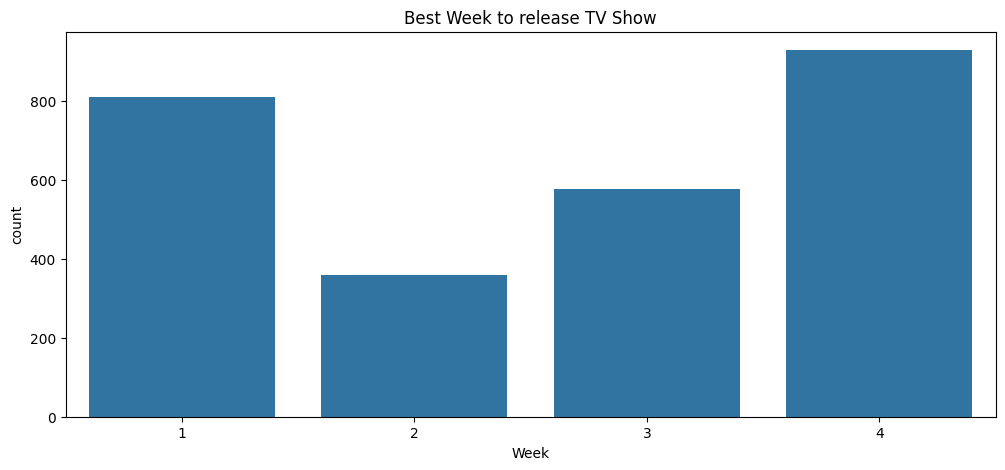

In [95]:
def besttimetvshow(data):
  tvdbst=data[data['type']=="TV Show"]
  plt.figure(figsize=(12, 5))
  sns.countplot(data=tvdbst, x='week')
  plt.title('Best Week to release TV Show')
  plt.xlabel('Week')
  plt.show()

besttimetvshow(data)


From this we can say that the 4th week is tyhe best time to release the TV Show

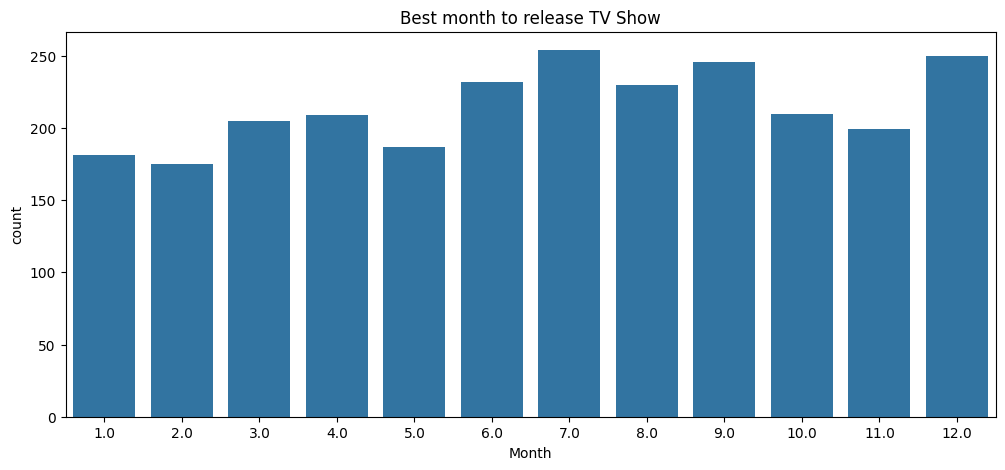

In [96]:
def besttimemtvshow(data):
  tvdbst=data[data['type']=="TV Show"]
  plt.figure(figsize=(12, 5))
  sns.countplot(data=tvdbst, x='month_added')
  plt.title('Best month to release TV Show')
  plt.xlabel('Month')
  plt.show()

besttimemtvshow(data)

We can say that the July Month is the best time to release the TV show

Overall we can conclude that 4th week and the july month would be the best time to release TV show

**What is the best time to launch a Movie?**

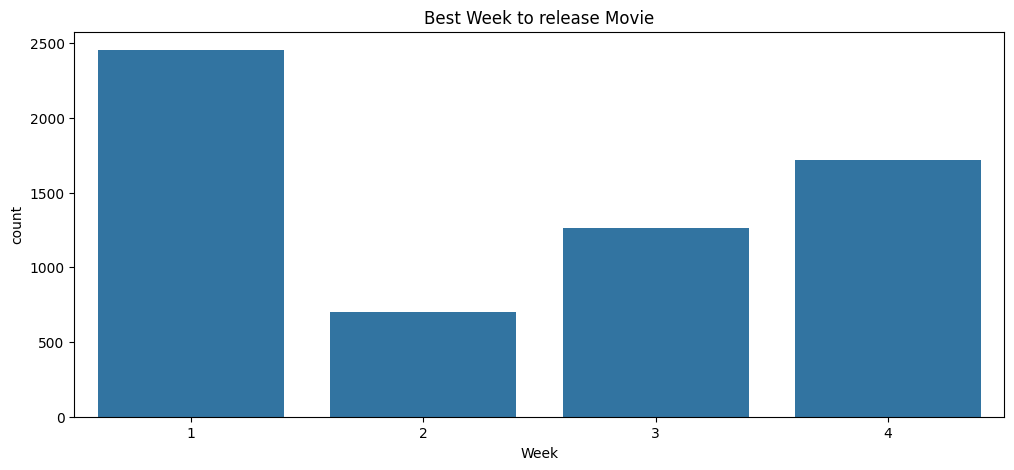

In [99]:
def besttimemvshow(data):
  tvdbst=data[data['type']=="Movie"]
  plt.figure(figsize=(12, 5))
  sns.countplot(data=tvdbst, x='week')
  plt.title('Best Week to release Movie')
  plt.xlabel('Week')
  plt.show()

besttimemvshow(data)

We can say the best week to release a movie is on the 1st week of the month

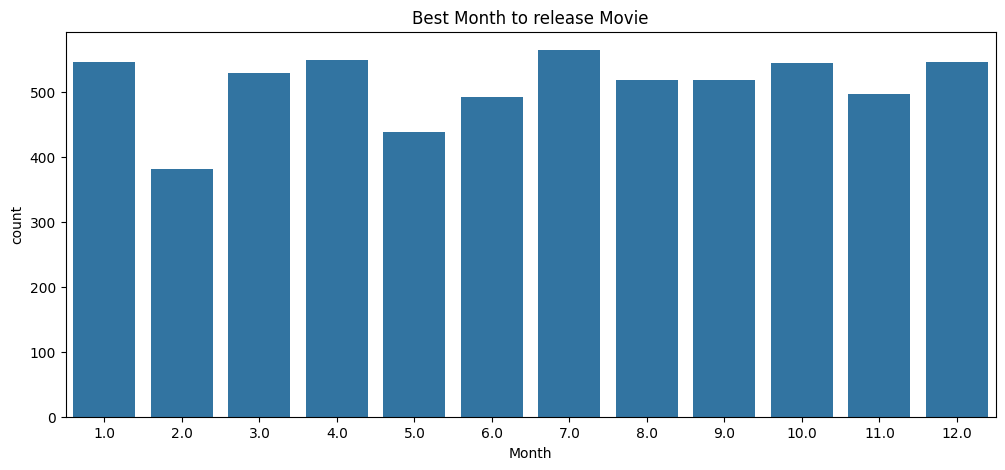

In [100]:
def besttimemmvshow(data):
  tvdbst=data[data['type']=="Movie"]
  plt.figure(figsize=(12, 5))
  sns.countplot(data=tvdbst, x='month_added')
  plt.title('Best Month to release Movie')
  plt.xlabel('Month')
  plt.show()

besttimemmvshow(data)

The best month to release a movie is in the month of July

# 4) Analysis of actors/directors of different types of shows/movies.

**Analysis on the Directors**

Top 10 directors who have directed most TV shows

In [103]:
datadirector=data[(data['type']=="TV Show" ) & (data['director']!="Unknown")]
directors = datadirector['director'].str.split(',').explode().str.strip()
directors.value_counts().head(10)

,count
director,
Alastair Fothergill,3
Ken Burns,3
Jung-ah Im,2
Gautham Vasudev Menon,2
Iginio Straffi,2
Hsu Fu-chun,2
Stan Lathan,2
Joe Berlinger,2
Shin Won-ho,2


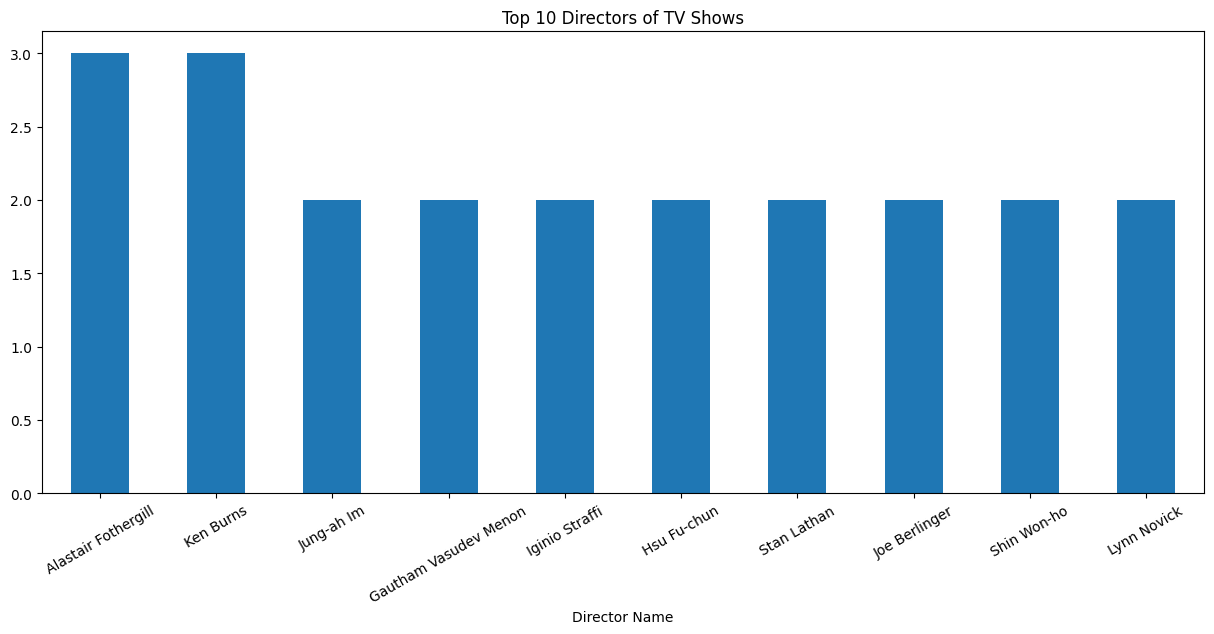

In [106]:
def top10directors(data):
  datadirector=data[(data['type']=="TV Show" ) & (data['director']!="Unknown")]
  directors = datadirector['director'].str.split(',').explode().str.strip()
  countofdirectors=directors.value_counts().head(10)
  plt.figure(figsize=(15, 6))
  countofdirectors.plot(kind='bar')
  plt.title('Top 10 Directors of TV Shows')
  plt.xlabel('Director Name')
  plt.xticks(rotation=30)
  plt.show()

top10directors(data)

We have Alastair Fothergill and Ken Burns who have directed most of the TV Shows which is about 3

Top 10 Directors who have directed Movies

In [105]:
datamoviedirector=data[(data['type']=="Movie" ) & (data['director']!="Unknown")]
directors = datamoviedirector['director'].str.split(',').explode().str.strip()
directors.value_counts().head(10)

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


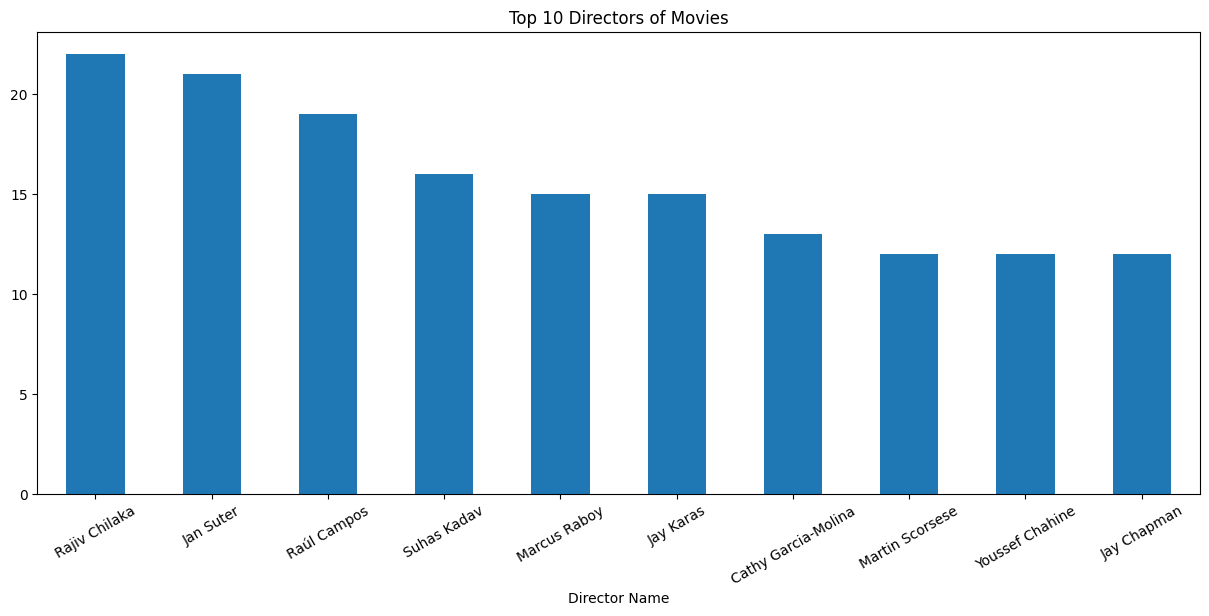

In [107]:
def top10moviedirectors(data):
  datamoviedirector=data[(data['type']=="Movie" ) & (data['director']!="Unknown")]
  directors = datamoviedirector['director'].str.split(',').explode().str.strip()
  countofdirectors=directors.value_counts().head(10)
  plt.figure(figsize=(15, 6))
  countofdirectors.plot(kind='bar')
  plt.title('Top 10 Directors of Movies')
  plt.xlabel('Director Name')
  plt.xticks(rotation=30)
  plt.show()

top10moviedirectors(data)

We have Rajiv Chiilaka and Jan Suter who have directed most of the movies that is 22 and 21 respectiviely

**Analysis on the Actors**

Top 10 Actors who have PLayed in most TV shows

In [108]:
datatvactor=data[(data['type']=="TV Show" ) & (data['cast']!="Unknown")]
actors = datatvactor['cast'].str.split(',').explode().str.strip()
actors.value_counts().head(10)

,count
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Daisuke Ono,17
Junichi Suwabe,17
Ai Kayano,17
Yuichi Nakamura,16
Jun Fukuyama,15
Yoshimasa Hosoya,15
David Attenborough,14


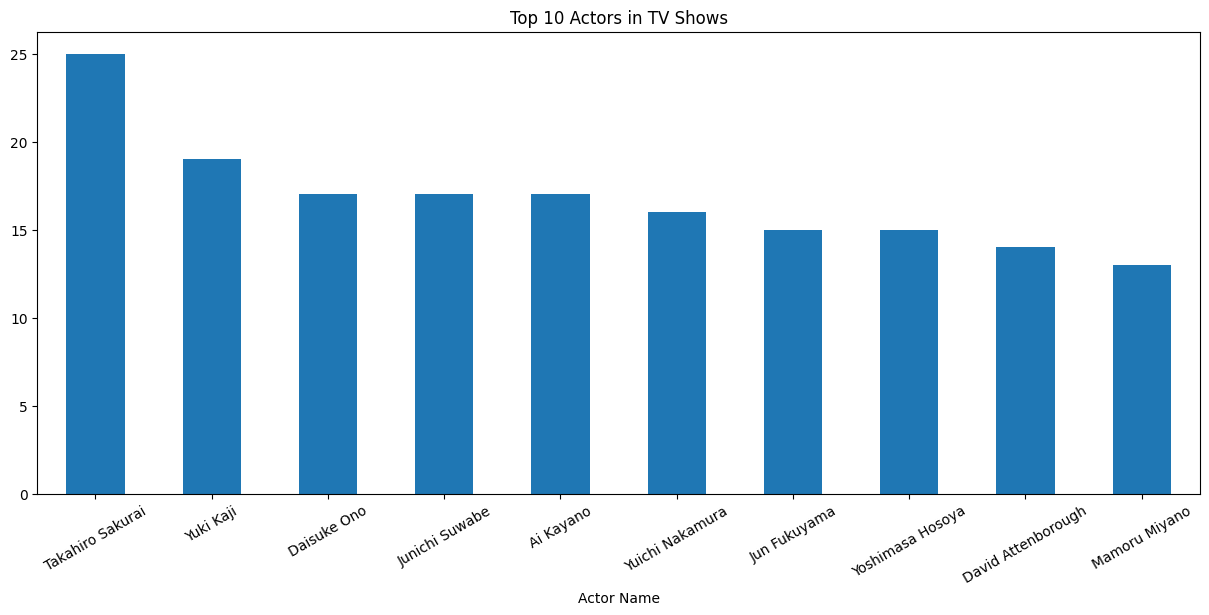

In [110]:
def top10tvactors(data):
  datatvactor=data[(data['type']=="TV Show" ) & (data['cast']!="Unknown")]
  actors = datatvactor['cast'].str.split(',').explode().str.strip()
  actors = actors.value_counts().head(10)
  plt.figure(figsize=(15, 6))
  actors.plot(kind='bar')
  plt.title('Top 10 Actors in TV Shows')
  plt.xlabel('Actor Name')
  plt.xticks(rotation=30)
  plt.show()

top10tvactors(data)

Takashiro is the actor who have played in highest no of TV shows that is 25

Top 10 Actors played in Movies

In [112]:
datamvoieactor=data[(data['type']=="Movie" ) & (data['cast']!="Unknown")]
actors = datamvoieactor['cast'].str.split(',').explode().str.strip()
actors.value_counts().head(10)

,count
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Akshay Kumar,30
Om Puri,30
Amitabh Bachchan,28
Julie Tejwani,28
Paresh Rawal,28
Rupa Bhimani,27


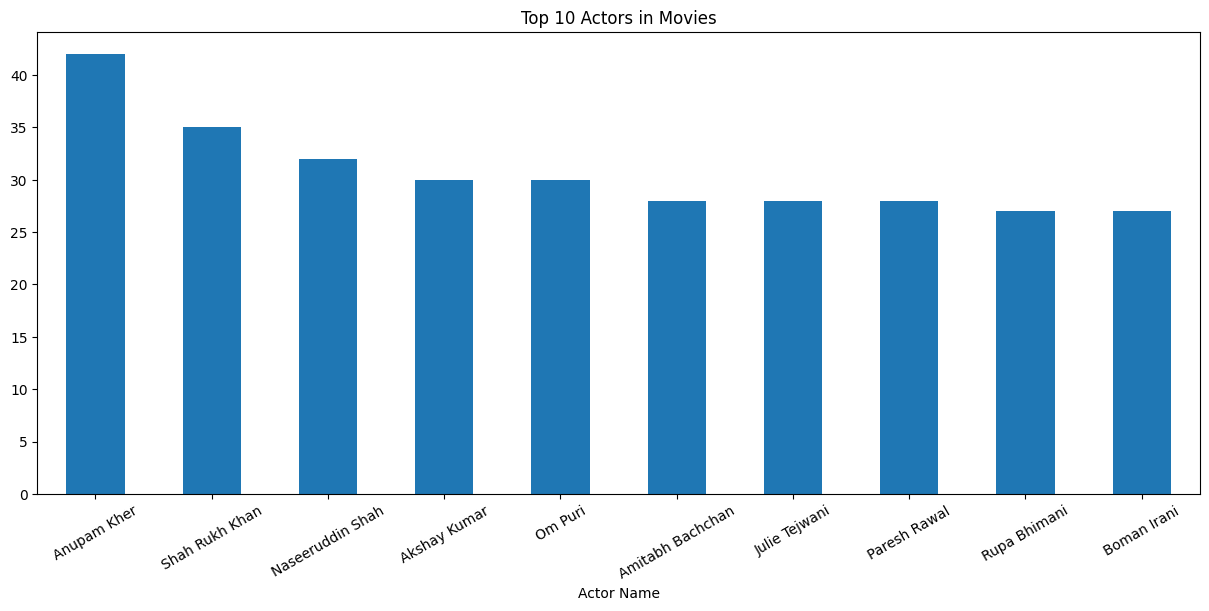

In [114]:
def top10movieactors(data):
  datamvoieactor=data[(data['type']=="Movie" ) & (data['cast']!="Unknown")]
  actors = datamvoieactor['cast'].str.split(',').explode().str.strip()
  actors = actors.value_counts().head(10)
  plt.figure(figsize=(15, 6))
  actors.plot(kind='bar')
  plt.title('Top 10 Actors in Movies')
  plt.xlabel('Actor Name')
  plt.xticks(rotation=30)
  plt.show()

top10movieactors(data)

We have Anupam Kher who has acted in most of the movies

# **5) Which genre movies are more popular or produced more**

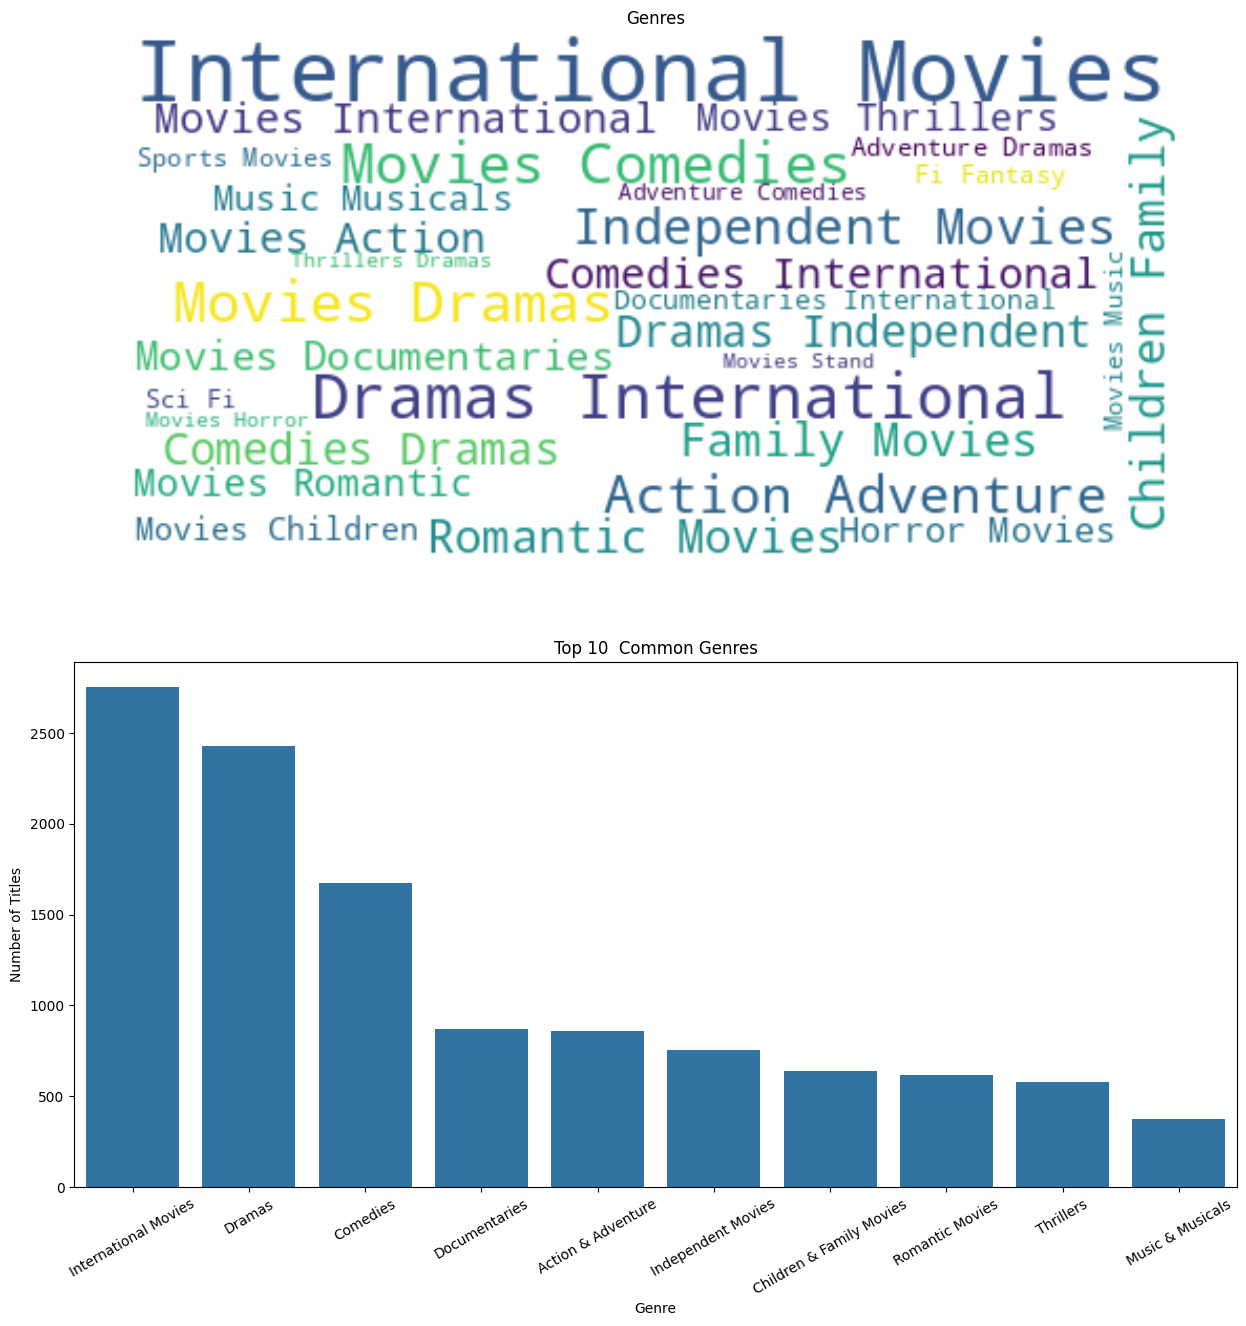

In [127]:
def genredata(data):
  plt.figure(figsize=(15, 15))
  plt.subplot(2, 1, 1)
  wordcloud = WordCloud(
  width=500, height=250,
  background_color='white',
  colormap='viridis',
  min_font_size=10,
  max_font_size=150).generate(' '.join(data['genre']))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Genres')
  plt.subplot(2, 1, 2)
  genre_counts = data['genre'].value_counts().head(10)
  sns.barplot(x=genre_counts.index, y=genre_counts.values)
  plt.title('Top 10  Common Genres')
  plt.xlabel('Genre')
  plt.ylabel('Number of Titles')
  plt.xticks(rotation=30)
  plt.show()

moviesdatatogenre= data[(data['type']=="Movie") & (data['type']!="UnKnown")]
genre_data = pd.DataFrame({
    'genre': moviesdatatogenre['listed_in'].str.split(',').explode().str.strip(),
    'type': moviesdatatogenre['type'].repeat(moviesdatatogenre['listed_in'].str.split(',').str.len())
})

genredata(genre_data)


We can Say that International Movies Genre is the highest among other movies genre and it accounts to about 2500

6) After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)

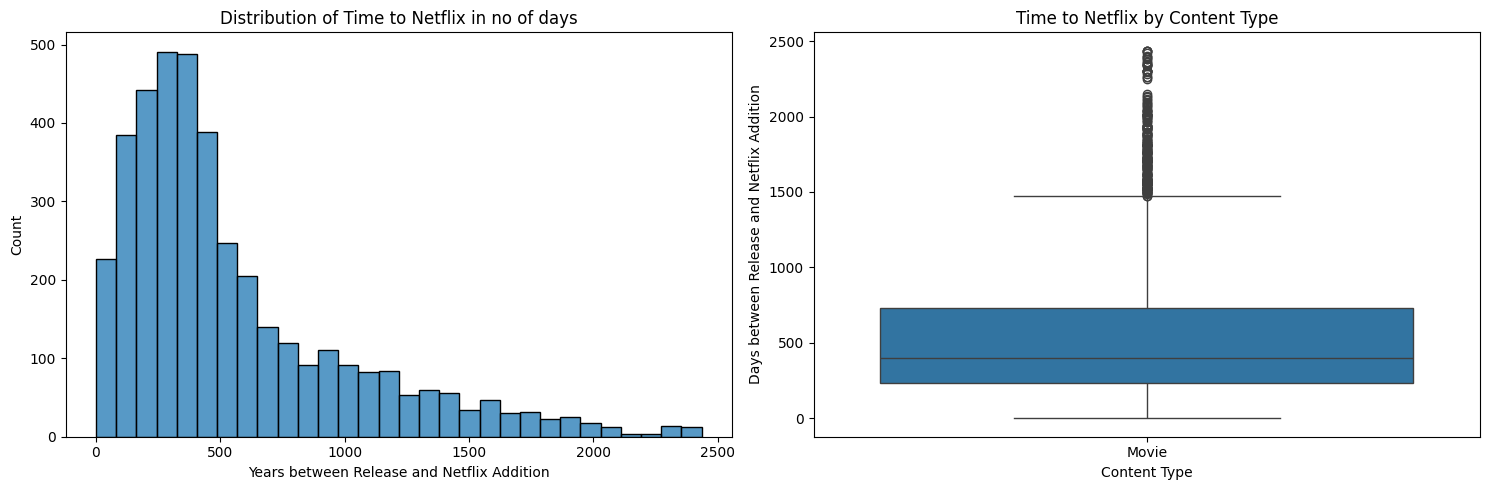

In [136]:
def timetoaddtonextflix(data):
  recent_data = data[data['release_year'] >= 2015]
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(data=recent_data, x='days_to_netflix', bins=30)
  plt.title('Distribution of Time to Netflix in no of days')
  plt.xlabel('Years between Release and Netflix Addition')
  plt.tight_layout()
  plt.subplot(1, 2, 2)
  sns.boxplot(data=recent_data, x='type', y='days_to_netflix')
  plt.title('Time to Netflix by Content Type')
  plt.xlabel('Content Type')
  plt.ylabel('Days between Release and Netflix Addition')
  plt.tight_layout()
  plt.show()

data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')
data['days_to_netflix'] = data.apply(lambda row: (row['date_added'] - pd.to_datetime(str(row['release_year']) + '-01-01')).days if not pd.isnull(row['date_added']) else np.nan, axis=1)
mvoiedata = data[(data['days_to_netflix'] >= 0) & (data['type'] == "Movie")]

timetoaddtonextflix(mvoiedata)

In [135]:
mvoiedata['days_to_netflix'].value_counts().head(1)

,count
days_to_netflix,
334.0,29


Most of the movies are added within 500 days what is almost 1 year and 4 months from the date of release of the movie. We can see the highest no of movies that were added was within a year that is of 334 days approximately 11 months after the release date